# **Aprendizaje No Supervisado**
## **K-Means**

In [131]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

**Escalamos y Unimos los dataset**

In [132]:
X = pd.read_csv("Data/X_data.csv")
y = pd.read_csv("Data/y_data.csv")

scaler = StandardScaler()
y_scaled = pd.DataFrame(scaler.fit_transform(y), columns=["Calories_Burned"])
merged_ds = pd.concat([X,y_scaled],axis=1)

merged_ds.to_csv("Data/data.csv", index=False)

**Leemos el dataset**

In [133]:
data = pd.read_csv("Data/data.csv")

In [134]:
bool_columns = ['Gender_Male', 'Workout_Type_HIIT', 'Workout_Type_Strength', 'Workout_Type_Yoga']
data[bool_columns] = data[bool_columns].astype(int)

In [135]:
features = ["Age", "Weight (kg)", "Height (m)", "Max_BPM", "Avg_BPM", "Resting_BPM",
            "Session_Duration (hours)", "Fat_Percentage", "Water_Intake (liters)",
            "Workout_Frequency (days/week)", "Experience_Level", "BMI",
            "Gender_Male", "Workout_Type_HIIT", "Workout_Type_Strength", "Workout_Type_Yoga",
            "Calories_Burned"]

X = data[features].copy()

In [136]:
X_scaled = X.values

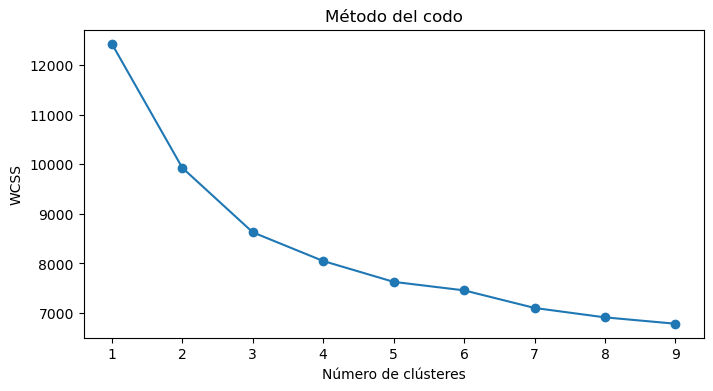

In [137]:
wcss = []
max_clusters = 9
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(range(1, max_clusters+1), wcss, marker='o')
plt.title('Método del codo')
plt.xlabel('Número de clústeres')
plt.ylabel('WCSS')
plt.show()

In [138]:
k = 4
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

In [139]:
data['Cluster'] = cluster_labels

In [140]:
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)

              Age  Weight (kg)  Height (m)   Max_BPM   Avg_BPM  Resting_BPM  \
Cluster                                                                       
0       -0.072958    -0.577353   -0.636067 -0.014622  0.032781     0.021479   
1       -0.042589    -0.022569    0.009269  0.033797 -0.024713     0.025152   
2       -0.086046     1.414332    0.656297  0.161523 -0.053853    -0.024517   
3        0.261829    -0.489114    0.674323 -0.149662 -0.026511    -0.038196   

         Session_Duration (hours)  Fat_Percentage  Water_Intake (liters)  \
Cluster                                                                    
0                       -0.330105        0.805088              -0.923121   
1                        1.451175       -1.611674               0.820943   
2                       -0.350981        0.031077               0.536374   
3                       -0.436991        0.038235               0.419649   

         Workout_Frequency (days/week)  Experience_Level       BMI  

### **Observaciones**
**Cluster 0:** Mujeres mayormente, más jóvenes, de menor talla y peso, con más porcentaje de grasa, entrenan con menos frecuencia y duración. Aun así, tienen bastante experiencia, pero su hidratación es pobre y su quema calórica es baja.\
**Cluster 1**: Grupo más “fit”: entrenan más tiempo y más veces por semana, muy bajo en grasa, excelente hidratación, altísima experiencia y queman más calorías. Mezcla equilibrada de géneros.\
**Cluster 2**: Hombres altos y pesados, con experiencia, bien hidratados, pero entrenan menos días y duran menos en cada sesión, lo que conlleva menor quema calórica. Aun así, tienen buena capacidad cardiaca (alto Max_BPM).\
**Cluster 3**: Hombres mayormente, más adultos, altos y muy delgados (bajo BMI), entrenan menos frecuente y durante menos tiempo, queman menos calorías, pero están bien hidratados y tienen experiencia. Quizás entrenan con menor intensidad o menor exigencia cardiaca.

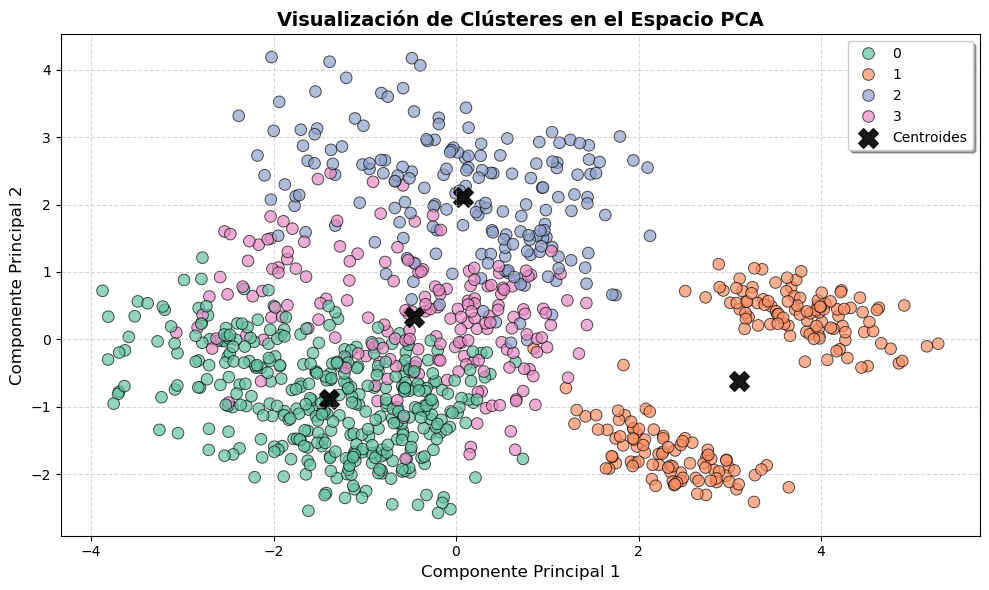

In [144]:
# Reducción de dimensionalidad a 2D con PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

# Transformar los centroides del espacio original al espacio PCA
centers = pca.transform(kmeans.cluster_centers_)

plt.figure(figsize=(10, 6))

# Crear el scatterplot de los datos proyectados
sns.scatterplot(x='pca1', y='pca2', hue='Cluster', data=data, 
                palette='Set2', s=70, alpha=0.7, edgecolor='black')

# Agregar los centroides al gráfico
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, 
            alpha=0.9, marker='X', label='Centroides')

# Ajustar título, etiquetas y estilo
plt.title('Visualización de Clústeres en el Espacio PCA', fontsize=14, fontweight='bold')
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)

# Añadir malla para mejorar la legibilidad
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar la posición de la leyenda
plt.legend(loc='upper right', frameon=True, fancybox=True, shadow=True)

# Hacer más compacta la distribución de subplots (aunque aquí hay uno solo)
plt.tight_layout()

plt.show()